In [ ]:
import numpy as np

In [3]:
x = np.array([1,2,3])
w = np.array([0.2, .8, -0.5])
b = 2

output = x[0]*w[0] + x[1]*w[1] + x[2]*w[2] + b

print(output)

2.3


In [4]:
input = np.array([1,2,3,2.5])
weight = np.array([0.2, 0.8, -0.5, 1.0])
b = 2


output = input[0]*weight[0] + input[1]*weight[1] + input[2]*weight[2] + input[3]*weight[3]+ b
print(output)


4.8


In [5]:
input =   np.array([1,2,3,2.5])
weights = np.array([ [0.2, 0.8, -0.5, 1],
            [0.5, -0.91, 0.26, -0.5],
            [-0.26, -0.27, 0.17, 0.87]])

biases = np.array([2, 3, 0.5])


outputs = []

for j in range(3):
    output = sum([input[i]*weights[j,i] for i in range(4)]) + biases[j]
    outputs.append(output)
    print(f"output{j} == {output}")

print(outputs)

output0 == 4.8
output1 == 1.21
output2 == 2.385
[np.float64(4.8), np.float64(1.21), np.float64(2.385)]


In [6]:
# for each neuron; associate the neuron and the bias
for n_weights, n_biases in zip(weights, biases):
    # init the total product sum of the input and its associated weight on the given nuron to 0
    total = 0
    # for each input and its associated weight
    for n_input, weight in zip(input, n_weights):
        total += n_input*weight
    # add the bias term
    total+= n_biases
    print(total)

4.8
1.21
2.385


Numpy approach

In [7]:
input = np.array([1,2,3,2.5])
weight = np.array([0.2, 0.8, -0.5, 1.0])
bias = 2


output = np.dot(input, weight) + bias
output


np.float64(4.8)

In [8]:
input =   np.array([1,2,3,2.5])
weights = np.array([ [0.2, 0.8, -0.5, 1],
            [0.5, -0.91, 0.26, -0.5],
            [-0.26, -0.27, 0.17, 0.87]])
biases = np.array([2, 3, 0.5])

outputs = np.dot(weights, input) + biases  # weights, input has to be weights, input.T but due to brodcasting it will compute 3 X 4   X     4 X 4
outputs

array([4.8  , 1.21 , 2.385])

In [9]:
inputs = np.array([[1.0, 2.0, 3.0, 2.5], 
          [2.0, 5.0, -1.0, 2.0], 
          [-1.5, 2.7, 3.3, -0.8]]) # 3 x 4
weights =np.array([[0.2, 0.8, -0.5, 1],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]) # 3 X 4

biases = np.array([2.0, 3.0, 0.5])

'''
INPUTS; are batch x input features
WEIGHT; features X neurons

the dot product will be INPUTS X WEIGHT.T
'''
outputs = np.dot(inputs, weights.T) + biases 


print(outputs)

[[ 4.8    1.21   2.385]
 [ 8.9   -1.81   0.2  ]
 [ 1.41   1.051  0.026]]


Adding more layer

In [ ]:
inputs = [[1, 2, 3, 2.5],
          [2., 5., -1., 2],
          [-1.5, 2.7, 3.3, -0.8]]

weights = [[0.2, 0.8, -0.5, 1],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]

biases = [2, 3, 0.5]

weights2 = [[0.1, -0.14, 0.5],
            [-0.5, 0.12, -0.33],
            [-0.44, 0.73, -0.13]]

biases2 = [-1, 2, -0.5]


input_batch = np.array(inputs)
weights_1 = np.array(weights)
biases_1 = np.array(biases)
weights_2 = np.array(weights2)
biases_2 = np.array(biases2)

# ouput with chain rule
# we will neuron first apprach
outputs = np.dot((np.dot(input_batch, weights_1.T)+biases_1), weights_2.T) + biases_2
'''
This is the same as 
output1 = np.dot(input_batch, weights_1.T)+biases_1
output2 = np.dot(output1, weights_2.T) + biases_2

output2 o output1 (input_batch)
'''


outputs


array([[ 0.5031 , -1.04185, -2.03875],
       [ 0.2434 , -2.7332 , -5.7633 ],
       [-0.99314,  1.41254, -0.35655]])

# Dense Linear Data

In [19]:
from nnfs.datasets import spiral_data
import matplotlib.pyplot as plt
import nnfs


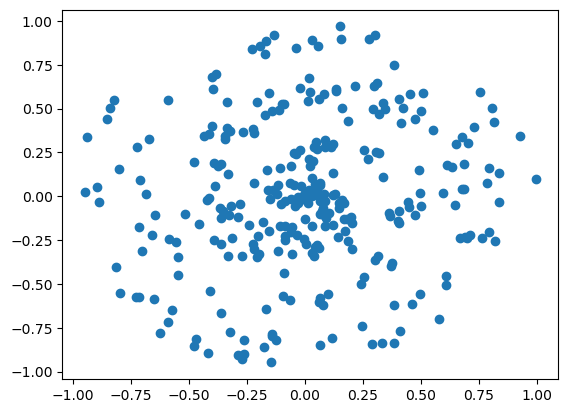

In [27]:
X, y = spiral_data(samples=100, classes=3)
plt.scatter(X[:,0], X[:,1])
plt.show()

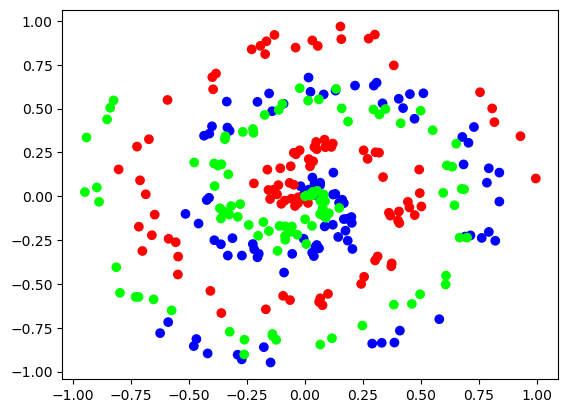

In [28]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg')
plt.show()

In [43]:
# class DenseLayer:
#     def __init__(self, n_input, n_neuron, bias):
#         self.n_input = n_input
#         self.n_neuron = n_neuron
#         self.bias = bias
        

#     def forward(self):
#         return np.dot(self.n_input, self.n_neuron.T) + self.bias

'''
The above is the general Idea 
for out case
'''

class Layer_Dense:
    def __init__(self, n_input, n_neuron):
        self.weight = 0.01 * np.random.randn(n_input, n_neuron)
        self.bias = np.zeros(n_neuron)
    def forward(self, inputs):
        print(np.dot(inputs, self.weight)+self.bias)
X, y = spiral_data(samples=100, classes=3)



first_dense = Layer_Dense(2, 3)
first_dense.forward(X)



[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-8.47887703e-05  9.64680838e-05 -5.20819120e-05]
 [-3.63197917e-04  1.48978410e-04  2.58550953e-05]
 [-4.38668343e-04  6.99413842e-05  1.34853948e-04]
 [-6.43309456e-04  1.52969632e-04  1.50281489e-04]
 [-9.07408589e-04  4.18548790e-04  2.09356093e-05]
 [-1.09183489e-03  4.73122428e-04  5.39196750e-05]
 [-8.86937425e-04  4.60690395e-05  3.62484290e-04]
 [-1.29389700e-03  8.08780794e-04 -1.69838323e-04]
 [-1.49795370e-03  4.04699576e-04  3.04232389e-04]
 [-1.65598331e-03  9.98242982e-04 -1.82632095e-04]
 [-1.13708497e-03 -1.17055589e-04  6.30639843e-04]
 [-7.83310296e-04 -4.15480913e-04  7.49892482e-04]
 [-2.24230650e-03  6.93715007e-04  3.72583942e-04]
 [-2.33366268e-03  6.34015799e-04  4.70634197e-04]
 [-1.38191709e-03 -2.72655647e-04  8.89273939e-04]
 [-1.43858061e-03 -3.13815515e-04  9.53981805e-04]
 [ 2.17066136e-04 -1.23785263e-03  1.06685784e-03]
 [ 3.45632051e-04 -1.35713573e-03  1.12040040e-03]
 [ 8.88265053e-05 -1.31948221e-